In [12]:
import pandas as pd
from pomegranate import *
import numpy as np
import bnlearn as bn

In [18]:
df = pd.read_csv("sonar_data.csv")

df.head()

,t,z,a,d
0,0.275,True,True,True
1,0.588,True,True,True
2,0.929,True,True,True
3,1.269,True,True,True
4,1.601,True,True,True


In [21]:
edges = [
    ('z', 'a'),
    ('a', 'd')
]

#Create Bayesian DAG
DAG = bn.make_DAG(edges)

[bnlearn] >bayes DAG created.


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


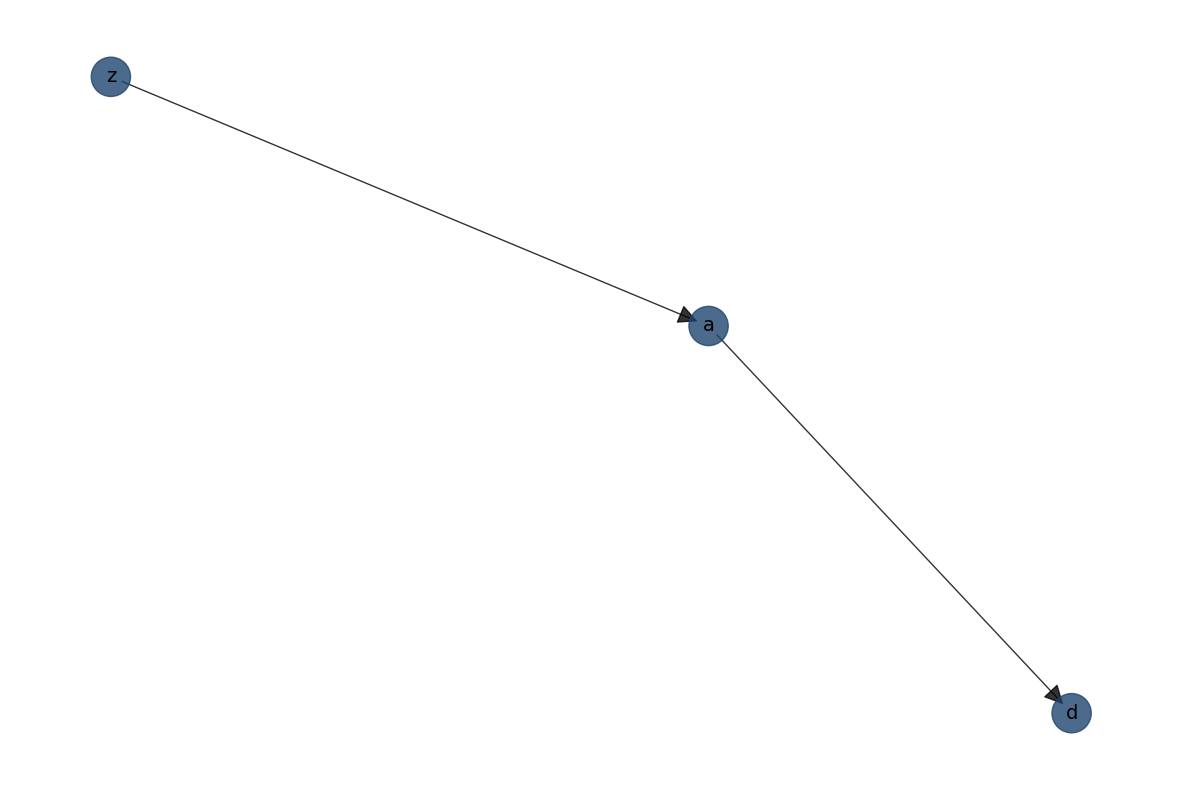

{'pos': {'z': array([-0.79878789,  0.86512983]),
  'a': array([0.12026995, 0.13487017]),
  'd': array([ 0.67851794, -1.        ])},
 'G': <networkx.classes.digraph.DiGraph at 0x25482d9b700>,
 'node_properties': {'z': {'node_color': '#1f456e', 'node_size': 800},
  'a': {'node_color': '#1f456e', 'node_size': 800},
  'd': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('z', 'a'): {'color': '#000000', 'weight': 1},
  ('a', 'd'): {'color': '#000000', 'weight': 1}}}

In [23]:
bn.plot(DAG)

In [25]:
DAG = bn.parameter_learning.fit(DAG, df, methodtype='maximumlikelihood')

[bnlearn] >Removing columns from dataframe to make consistent with DAG [['t']]
[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of z:
+----------+----------+
| z(False) | 0.578313 |
+----------+----------+
| z(True)  | 0.421687 |
+----------+----------+
[bnlearn] >CPD of a:
+----------+--------------------+---------+
| z        | z(False)           | z(True) |
+----------+--------------------+---------+
| a(False) | 0.6666666666666666 | 0.8     |
+----------+--------------------+---------+
| a(True)  | 0.3333333333333333 | 0.2     |
+----------+--------------------+---------+
[bnlearn] >CPD of d:
+---------+----------+---------+
| a       | a(False) | a(True) |
+---------+----------+---------+
| d(True) | 1.0      | 1.0     |
+---------+----------+---------+


In [26]:
CPD = bn.print_CPD(DAG)

[bnlearn] >Data is stored in [query.df]
+----+-----+----------+
|    |   z |        p |
+====+=====+==========+
|  0 |   0 | 0.578313 |
+----+-----+----------+
|  1 |   1 | 0.421687 |
+----+-----+----------+
CPD of z:
+----------+----------+
| z(False) | 0.578313 |
+----------+----------+
| z(True)  | 0.421687 |
+----------+----------+
[bnlearn] >Data is stored in [query.df]
+----+-----+-----+----------+
|    |   a |   z |        p |
+====+=====+=====+==========+
|  0 |   0 |   0 | 0.666667 |
+----+-----+-----+----------+
|  1 |   0 |   1 | 0.8      |
+----+-----+-----+----------+
|  2 |   1 |   0 | 0.333333 |
+----+-----+-----+----------+
|  3 |   1 |   1 | 0.2      |
+----+-----+-----+----------+
CPD of a:
+----------+--------------------+---------+
| z        | z(False)           | z(True) |
+----------+--------------------+---------+
| a(False) | 0.6666666666666666 | 0.8     |
+----------+--------------------+---------+
| a(True)  | 0.3333333333333333 | 0.2     |
+----------+------

In [28]:
q1 = bn.inference.fit(DAG, variables=["d"], evidence={'z':1})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-----+-----+
|    |   d |   p |
+====+=====+=====+
|  0 |   0 |   1 |
+----+-----+-----+
